In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# Specify paths
# parcel_file_csv = "Data/Greenville_parcels_regression.csv"
parcel_file_shp = "Data/Greenville_test/Parcels_Greenville.shp"
results_path = "Results/Kriging_Greenville/"  # Change this for different output files

### Buyers, sellers, transactions


In [3]:
df_list = []

i = 0
for file in os.listdir(results_path):
    if file.startswith("model"):
        model_df = pd.read_pickle(results_path + file)
        model_df["Step"] = model_df.index
        model_df["Run"] = int(file.split("]")[0][-1])
        df_list.append(model_df)
        i += 1

model_df = pd.concat(df_list)
model_df["Year"] = 0.5 * model_df["Step"]
model_df

,Households,N_sellers,N_buyers,Sold properties,Successful sellers,Successful buyers,P_ask,P_bid,P_trans,Trans history,Regression coefs,Step,Run,Year
0,9793,0,0,[],[],[],[],[],[],0,"[10.686028411962486, -0.012580388493685183, 0....",0,0,0.0
1,10119,389,326,"[40925.0, 47150.0, 31333.0, 54424.0, 19323.0, ...","[201, 398, 579, 584, 860, 915, 1004, 1159, 122...","[9914, 10085, 10013, 9956, 9994, 10040, 9855, ...","[265000.0, 158700.0, 139600.0, 155800.0, 11600...","[277000, 157000, 146000, 158000, 115000, 61000...","[277000, 157000, 146000, 158000, 116000.0, 610...",0,"[10.686028411962486, -0.012580388493685183, 0....",1,0,0.5
2,10337,741,544,"[11498.0, 53156.0, 47702.0, 25287.0, 37773.0, ...","[109, 232, 233, 256, 280, 299, 388, 396, 514, ...","[10219, 10501, 10360, 10488, 9850, 10506, 9967...","[94800.0, 127800.0, 276400.0, 145900.0, 120300...","[94000, 129000, 289000, 151000, 122000, 118000...","[94000, 129000, 289000, 151000, 122000, 118000...",1,"[10.686028411962486, -0.012580388493685183, 0....",2,0,1.0
3,10497,974,704,"[8298.0, 13900.0, 583.0, 44585.0, 47357.0, 202...","[36, 149, 221, 288, 314, 325, 363, 377, 416, 4...","[9841, 10155, 10821, 10811, 10736, 10594, 1060...","[73900.0, 77200.0, 139788.0, 238590.0, 166100....","[74000, 76000, 139000, 245000, 165000, 246000,...","[74000, 76000, 139000, 245000, 165000, 246000,...",2,"[10.686028411962486, -0.012580388493685183, 0....",3,0,1.5
4,10513,977,720,"[39484.0, 37591.0, 20434.0, 49655.0, 30302.0, ...","[66, 67, 68, 89, 111, 122, 127, 147, 160, 172,...","[9803, 1791, 11103, 11008, 3405, 10549, 11169,...","[201168.0, 115929.0, 68409.0, 190575.0, 254100...","[210000, 118000, 68000, 199000, 262000, 63000,...","[210000, 118000, 68000, 199000, 262000, 63000,...",3,"[10.686028411962486, -0.012580388493685183, 0....",4,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,10615,925,822,"[22092.0, 2067.0, 39481.0, 21946.0, 25671.0, 2...","[107, 532, 654, 704, 1064, 1065, 1229, 1678, 1...","[28767, 28307, 6797, 28852, 28850, 28990, 2835...","[113355.0, 399800.0, 138700.0, 83160.0, 97500....","[117000, 413000, 144000, 85000, 102000, 87000,...","[117000, 413000, 144000, 85000, 102000, 87000,...",4,"[10.12236638534242, -0.011536768034627344, -0....",56,1,28.0
57,10591,919,798,"[20473.0, 30481.0, 18190.0, 31245.0, 2313.0, 3...","[132, 164, 181, 190, 559, 813, 814, 942, 1176,...","[22603, 29099, 29064, 16195, 28912, 22575, 292...","[67419.0, 161073.0, 62800.0, 92862.0, 385600.0...","[68000, 158000, 65000, 97000, 402000, 66000, 1...","[68000, 158000, 65000, 97000, 402000, 66000, 1...",5,"[10.137226032089444, -0.01163263921491247, -0....",57,1,28.5
58,10577,873,784,"[45237.0, 19115.0, 28421.0, 11970.0, 19044.0, ...","[257, 512, 656, 921, 1155, 1244, 1269, 1386, 1...","[29441, 29429, 29663, 29422, 29338, 29440, 100...","[121300.0, 117018.0, 167013.0, 143748.0, 20570...","[121000, 112000, 171000, 147000, 208000, 12100...","[121000, 112000, 171000, 147000, 208000, 12100...",6,"[10.124773228748959, -0.01160741050729279, -0....",58,1,29.0
59,10539,809,746,"[29444.0, 18141.0, 10174.0, 12620.0, 3236.0, 4...","[424, 457, 503, 740, 833, 952, 1103, 1137, 148...","[29714, 29922, 29421, 10360, 29708, 29281, 164...","[155430.0, 79299.0, 89900.0, 90783.0, 96030.0,...","[156000, 81000, 89000, 89000, 92000, 544000, 6...","[156000, 81000, 89000, 89000, 92000, 544000, 6...",44,"[10.144826965148432, -0.0110178931080731, -0.1...",59,1,29.5


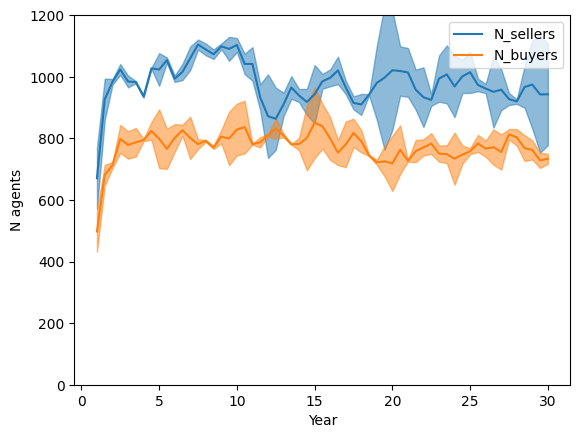

In [5]:
%matplotlib inline
model_df_mean = model_df.groupby(["Year"])[["N_sellers", "N_buyers"]].mean()
model_df_std = model_df.groupby(["Year"])[["N_sellers", "N_buyers"]].std()

model_df_mean = model_df_mean[1:]
model_df_std = model_df_std[1:]

model_df_mean.plot()
for i, group in enumerate(["N_sellers", "N_buyers"]):
    plt.fill_between(model_df_mean.index,
                     (model_df_mean - model_df_std)[group],
                     (model_df_mean + model_df_std)[group],
                     color=plt.legend().legendHandles[i].get_color(),
                     alpha=0.5)

plt.ylabel("N agents")
plt.ylim(0, 1200)
plt.show()

### Prices, incomes, transactions per flood zone

In [6]:
# Read spatial data
spatial_df = gpd.read_file(parcel_file_shp)
spatial_df = spatial_df.rename(columns={"OBJECTID": "Property ID"}).set_index("Property ID")

# Redo original preprocessing for relevant parcel attributes
spatial_df.loc[spatial_df["dflood"] == 1, "FLOOD_PROB"] = 0.01
spatial_df = spatial_df.drop(columns=["dflood"])
spatial_df["FLOOD_PROB"] = spatial_df["FLOOD_PROB"].fillna(0)

spatial_df.head()

,AREA,SQUAREFEET,ACRES,USECODE,YEARBUILT,HEATEDSQFT,TOTALSQFT,ELEMENTARY,MIDDLESCHO,HIGHSCHOOL,...,LNPRICE,RESID,PRED,AGEnorm,SQFTnorm,ACRESnorm,BEDRMnorm,RESIDnorm,geometry,FLOOD_PROB
Property ID,,,,,,,,,,,,,,,,,,,,,
7,16115.583330,0.0,0.36,SFR CONST(SFR),1962,2632,2632.0,SOUTH GREENVILLE ELEM,E B AYCOCK MID,J H ROSE HIGH,...,11.880686,-0.005408,11.886094,0.708029,0.244014,0.422403,0.250,0.623440,POINT (2486476.171 672841.652),0.0
9,18935.010417,0.0,0.43,SFR CONST(SFR),1963,1729,1729.0,SOUTH GREENVILLE ELEM,E B AYCOCK MID,J H ROSE HIGH,...,11.452452,-0.015813,11.468265,0.744526,0.145294,0.448370,0.250,0.549592,POINT (2490529.838 673371.158),0.0
11,14096.792534,0.0,0.32,SFR CONST(SFR),1958,1841,1841.0,ELMHURST ELEM,C M EPPES MID,J H ROSE HIGH,...,11.467880,0.044854,11.423025,0.678832,0.157538,0.405190,0.250,0.611574,POINT (2488502.648 674034.682),0.0
25,11508.052084,0.0,0.26,SFR CONST(SFR),1962,1510,1510.0,CREEKSIDE ELEM,A G COX MID,SOUTH CENTRAL HIGH,...,10.882200,-0.352043,11.234243,0.708029,0.121351,0.374846,0.250,0.143139,POINT (2476936.270 682608.401),0.0
28,10759.437501,0.0,0.24,SFR CONST(SFR),1951,1806,1806.0,ELMHURST ELEM,C M EPPES MID,J H ROSE HIGH,...,11.450039,0.187795,11.262243,0.627737,0.153712,0.363148,0.125,0.759412,POINT (2486913.726 675544.796),0.0


In [7]:
buyers_df_list = []
owners_df_list = []
i = 0
for file in os.listdir(results_path):
    if file.startswith("agent"):
        agent_df = pd.read_pickle(results_path + file)
        buyers_df = agent_df[(agent_df["Type"] == "Household") & (agent_df['Property ID'].isna())].copy()
        buyers_df["Run"] = int(file.split("]")[0][-1])
        buyers_df_list.append(buyers_df)
        owners_df = agent_df[(agent_df["Type"] == "Household") & (~agent_df['Property ID'].isna())].copy()
        owners_df["Run"] = int(file.split("]")[0][-1])
        owners_df_list.append(owners_df)
        i += 1

owners_df = pd.concat(owners_df_list)
owners_df = owners_df.reset_index().set_index("Property ID")
owners_df["FLOOD_PROB"] = spatial_df["FLOOD_PROB"]
owners_df["Year"] = 0.5 * owners_df["Step"]
owners_df["geometry"] = spatial_df["geometry"]
owners_df = gpd.GeoDataFrame(owners_df)
owners_df = owners_df.reset_index().set_index(["Year", "Run", "FLOOD_PROB"])

buyers_df = pd.concat(buyers_df_list).reset_index()
buyers_df["Year"] = 0.5 * buyers_df["Step"]
buyers_df = buyers_df.set_index(["Year", "Run"])

owners_df

Property ID  Step  AgentID       Type Market status  \
Year Run FLOOD_PROB                                                        
0.0  1   0.0             25699.0     0        1  Household      Inactive   
         0.0             11437.0     0        2  Household      Inactive   
         0.0             18433.0     0        3  Household      Inactive   
         0.0             44604.0     0        4  Household      Inactive   
         0.0              2702.0     0        5  Household      Inactive   
...                          ...   ...      ...        ...           ...   
30.0 0   0.0             51567.0    60    30635  Household      Inactive   
         0.0             17742.0    60    30638  Household      Inactive   
         0.0             53138.0    60    30639  Household      Inactive   
         0.0               419.0    60    30643  Household      Inactive   
         0.0              7367.0    60    30644  Household      Inactive   

                      Income  Property price  Property N sales Coastal pref  \
Year Run FLOOD_PROB                                                           
0.0  1   0.0         38740.0    89307.148279               0.0         None   
         0.0         82580.0   180096.047235               0.0         None   
         0.0         39520.0    81828.253330               0.0         None   
         0.0         33400.0   231219.680998               0.0         None   
         0.0         30730.0   157634.898927               0.0         None   
...                      ...             ...               ...          ...   
30.0 0   0.0         31880.0   242000.000000               4.0         None   
         0.0          8362.0    67000.000000               3.0         None   
         0.0         16550.0   120000.000000               1.0         None   
         0.0         11200.0    87000.000000               3.0         None   
         0.0          8362.0    69000.000000               4.0         None   

                     RP bias                        geometry  
Year Run FLOOD_PROB                                           
0.0  1   0.0             0.0  POINT (2477734.322 666093.195)  
         0.0             0.0  POINT (2482547.880 669044.688)  
         0.0             0.0  POINT (2492153.445 677012.471)  
         0.0             0.0  POINT (2494311.989 667734.437)  
         0.0             0.0  POINT (2497773.356 669109.217)  
...                      ...                             ...  
30.0 0   0.0             0.0  POINT (2488686.385 662239.517)  
         0.0             0.0  POINT (2490796.554 674914.478)  
         0.0             0.0  POINT (2493923.224 671883.752)  
         0.0             0.0  POINT (2482270.394 672577.580)  
         0.0             0.0  POINT (2494084.209 674821.040)  

[1194746 rows x 11 columns]

#### Household incomes

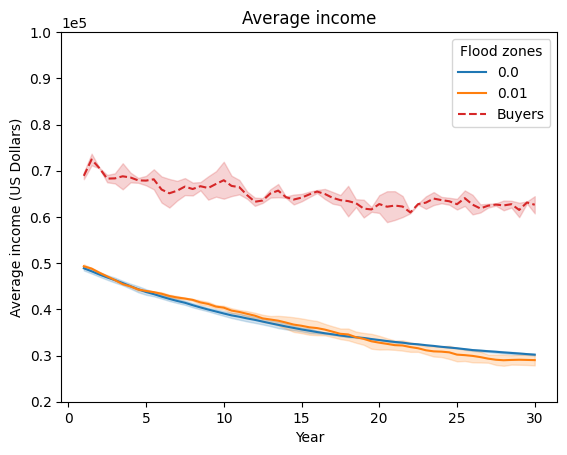

In [9]:
# Buyers income
buyers_mean = buyers_df[["Income"]].groupby(["Year", "Run"]).mean().groupby("Year").mean()
buyers_std = buyers_df[["Income"]].groupby(["Year", "Run"]).mean().groupby("Year").std()

# Owners income per flood zone
owners_mean = owners_df[["Income"]].groupby(["Year", "Run", "FLOOD_PROB"]).mean()["Income"].groupby(["Year", "FLOOD_PROB"]).mean().unstack()
owners_std = owners_df[["Income"]].groupby(["Year", "Run", "FLOOD_PROB"]).mean()["Income"].groupby(["Year", "FLOOD_PROB"]).std().unstack()

# Do not plot first timestep
owners_mean = owners_mean.loc[1:]
owners_std = owners_std.loc[1:]
buyers_mean = buyers_mean[1:]
buyers_std = buyers_std[1:]

# Plot average incomes + std
fig, ax = plt.subplots()
owners_mean.plot(ax=ax)
for i, prob in enumerate([0, 0.01]):
    ax.fill_between(owners_mean.index,
                    owners_mean[prob] - owners_std[prob],
                    owners_mean[prob] + owners_std[prob],
                    alpha=0.2, color=plt.legend().legendHandles[i].get_color())

ax.plot(buyers_mean, label="Buyers", color="tab:red", ls="--")
ax.fill_between(buyers_mean.index,
                (buyers_mean - buyers_std).values.flatten(),
                (buyers_mean + buyers_std).values.flatten(),
                alpha=0.2, color="tab:red")

plt.ticklabel_format(axis='y', scilimits=(0, 0))
plt.ylim(2e4, 1e5)
plt.ylabel("Average income (US Dollars)")
plt.title("Average income")
plt.legend(title="Flood zones")
plt.show()

#### Property prices

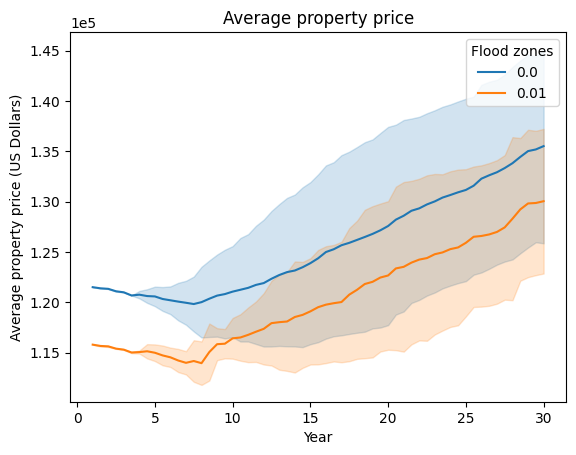

In [10]:
%matplotlib inline
# Average property prices
owners_mean = owners_df[["Property price"]].groupby(["Year", "Run", "FLOOD_PROB"]).mean()["Property price"].groupby(["Year", "FLOOD_PROB"]).mean().unstack()
owners_std = owners_df[["Property price"]].groupby(["Year", "Run", "FLOOD_PROB"]).mean()["Property price"].groupby(["Year", "FLOOD_PROB"]).std().unstack()

owners_mean = owners_mean[1:]
owners_std = owners_std[1:]

fig, ax = plt.subplots()
owners_mean.plot(ax=ax)
for i, prob in enumerate([0, 0.01]):
    ax.fill_between(owners_mean.index,
                    owners_mean[prob] - owners_std[prob],
                    owners_mean[prob] + owners_std[prob],
                    alpha=0.2, color=plt.legend().legendHandles[i].get_color())

plt.ticklabel_format(axis='y', scilimits=(0, 0))
# plt.ylim(1.5e5, 5e5)
plt.ylabel("Average property price (US Dollars)")
plt.title("Average property price")
plt.legend(title="Flood zones")
plt.show()

#### Income/price ratio (compare runs)

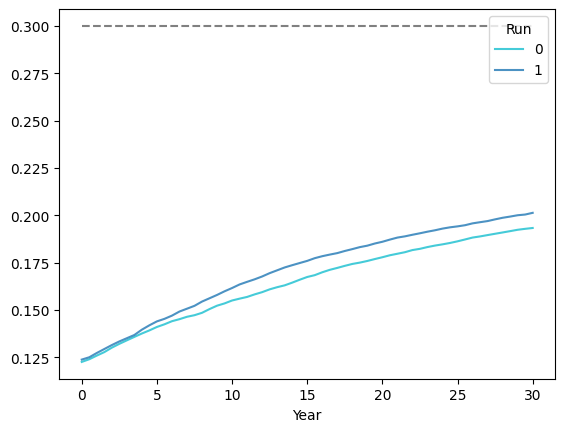

In [11]:
# Get ratio of property price / income / 30 (years mortgage).
# The resulting number is related to the maximum 30% of income spent on housing
# rule as described in Filatova (2015). The grey line indicated this maximum value.
ratio_df = owners_df[["Income", "Property price"]].copy()
ratio_df["Income price ratio"] = ratio_df["Property price"]/ratio_df["Income"]/30
ratio_df = ratio_df.groupby(["Year", "Run"]).mean()["Income price ratio"].unstack()
ratio_df.plot(cmap="tab10_r", alpha=0.8)
plt.hlines(0.3, min(ratio_df.index), max(ratio_df.index),
           color="grey", linestyle="--")
plt.show()

#### Income/price ratio (average over runs, per flood zone)

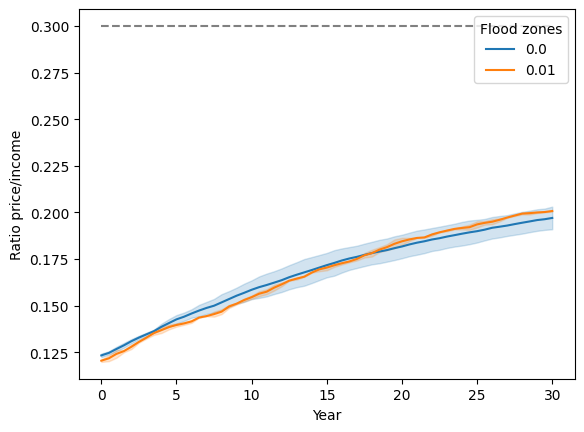

In [12]:
# Owners income per flood zone
owners_df["Income price ratio"] = owners_df["Property price"]/owners_df["Income"]/30
owners_mean = owners_df[["Income price ratio"]].groupby(["Year", "Run", "FLOOD_PROB"]).mean()["Income price ratio"].groupby(["Year", "FLOOD_PROB"]).mean().unstack()
owners_std = owners_df[["Income price ratio"]].groupby(["Year", "Run", "FLOOD_PROB"]).mean()["Income price ratio"].groupby(["Year", "FLOOD_PROB"]).std().unstack()

# Plot average incomes + std
fig, ax = plt.subplots()
owners_mean.plot(ax=ax)
for i, prob in enumerate([0, 0.01]):
    ax.fill_between(owners_mean.index,
                    owners_mean[prob] - owners_std[prob],
                    owners_mean[prob] + owners_std[prob],
                    alpha=0.2, color=plt.legend().legendHandles[i].get_color())

plt.hlines(0.3, min(ratio_df.index), max(ratio_df.index),
           color="grey", linestyle="--")
plt.ylabel("Ratio price/income")
plt.legend(title="Flood zones")
plt.show()

#### Transactions per flood zone

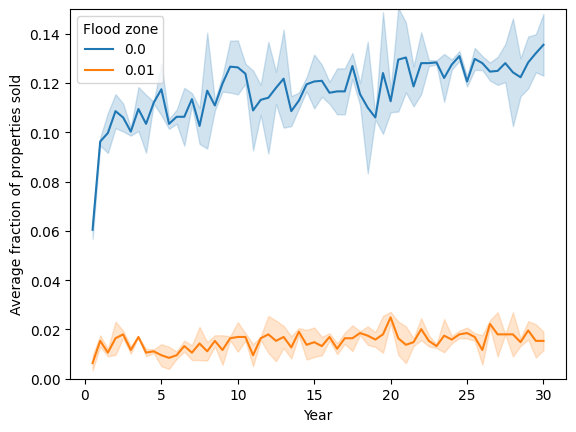

In [13]:
# Load transactions and order per run per property
trans_per_flood_df = model_df[["Sold properties", "P_ask", "P_bid", "P_trans", "Run"]].copy()
trans_per_flood_df = trans_per_flood_df.drop(0)
trans_per_flood_df.index.rename("Year", inplace=True)
trans_per_flood_df.index = trans_per_flood_df.index * 0.5
trans_per_flood_df = trans_per_flood_df.set_index("Run", append=True)
trans_per_flood_df = trans_per_flood_df.explode(["Sold properties", "P_ask", "P_bid", "P_trans"])
trans_per_flood_df = trans_per_flood_df.reset_index().set_index(["Run", "Sold properties"])

trans_per_flood_df = pd.get_dummies(trans_per_flood_df["Year"])
trans_per_flood_df = trans_per_flood_df.groupby(["Run", "Sold properties"]).sum()
trans_per_flood_df = trans_per_flood_df.reset_index().set_index(["Sold properties"])
trans_per_flood_df = trans_per_flood_df.merge(spatial_df[["FLOOD_PROB"]], left_index=True, right_index=True)
trans_per_flood_df = trans_per_flood_df.groupby(["FLOOD_PROB", "Run"]).sum()
trans_per_flood_df = trans_per_flood_df.transpose()
trans_per_flood_df[0.01] = trans_per_flood_df[0.01]/944
trans_per_flood_df[0] = trans_per_flood_df[0]/1745

# Get mean and std over runs
trans_per_flood_df_mean = trans_per_flood_df.transpose().groupby("FLOOD_PROB").mean()
trans_per_flood_df_std = trans_per_flood_df.transpose().groupby("FLOOD_PROB").std()
trans_per_flood_df_std

trans_per_flood_df_mean.transpose().plot()
for i, prob in enumerate([0, 0.01]):
    plt.fill_between(list(trans_per_flood_df_mean.columns.values),
                     trans_per_flood_df_mean.loc[prob] - trans_per_flood_df_std.loc[prob],
                     trans_per_flood_df_mean.loc[prob] + trans_per_flood_df_std.loc[prob],
                     alpha=0.2, color=plt.legend().legendHandles[i].get_color())

plt.ylim(0, 0.15)
plt.xlabel("Year")
plt.ylabel("Average fraction of properties sold")
plt.legend(title="Flood zone")
plt.show()

## Price estimation: fitting regression or kriging model

#### Regression coefficients

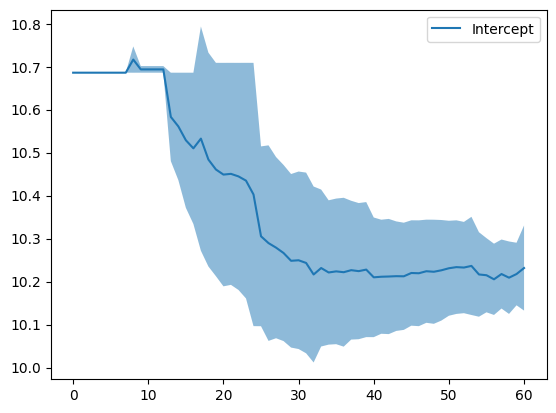

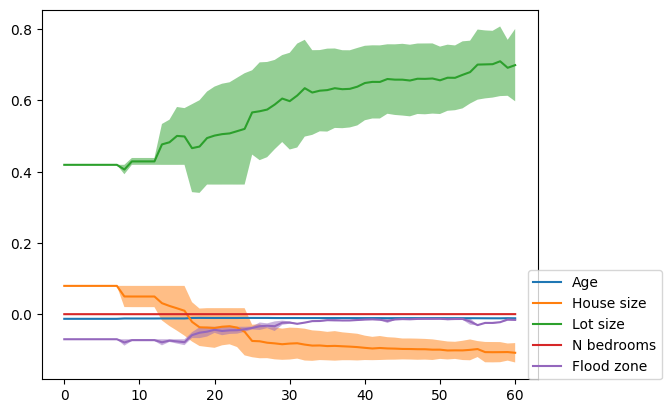

In [14]:
%matplotlib inline
coefs_avg = model_df["Regression coefs"].groupby(model_df["Step"]).mean()
coefs_std = model_df[["Regression coefs"]].stack().groupby(level=0).apply(lambda x:
                                                                          np.round(np.array(x).std(), 4))

coefs_avg = pd.DataFrame(coefs_avg.values.tolist())
coefs_std = pd.DataFrame(coefs_std.values.tolist())

coefs_avg[0].plot(label="Intercept")
plt.fill_between(coefs_avg.index,
                 coefs_avg[0] - coefs_std[0],
                 coefs_avg[0] + coefs_std[0],
                 alpha=0.5)
# plt.ylim(10, 14)
plt.legend()
plt.show()

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)
if "Results/Kriging" in results_path:
    labels = ["Age", "House size", "Lot size", "N bedrooms", "Flood zone"]
else:
    labels = ["Bathroom", "Bathroom^2",
              "Age", "Age^2",
              "House size", "House size^2",
              "Lot size", "Lot size^2",
              "New home", "Post firm", "100 flood zone", "500 flood zone", "Coastal front",
              "Distance amen", "Distance CBD", "Distance highway", "Distance park"
             ]
coefs_avg = coefs_avg.drop(columns=0)
coefs_std = coefs_std.drop(columns=0)
for coef in coefs_avg.columns:
    plt.plot(coefs_avg[coef], label=labels[coef-1])
for coef in coefs_avg.columns:
    plt.fill_between(coefs_avg.index,
                     coefs_avg[coef] - coefs_std[coef],
                     coefs_avg[coef] + coefs_std[coef],
                     alpha=0.5)
# plt.ylim(-0.1, 0.1)
plt.legend(loc=(0.98, 0))
plt.show()

#### Number of historical transactions needed to fit model


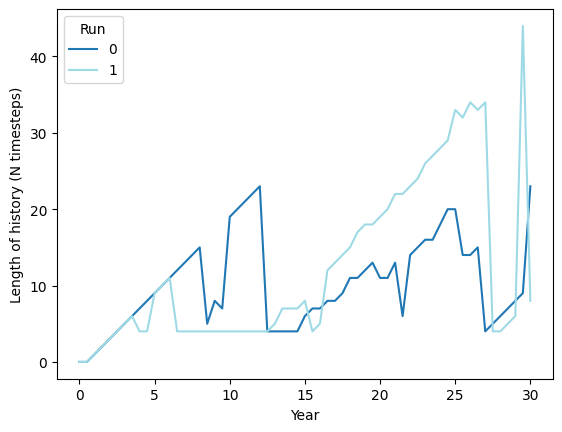

In [15]:
%matplotlib inline

trans_history = model_df.groupby(["Year", "Run"])["Trans history"].mean().unstack()
trans_history.plot(cmap="tab20")
plt.ylabel("Length of history (N timesteps)")
plt.show()

## Spatial plots


#### Variables per agent/property

In [26]:
property_df_list = []
i = 0
for file in os.listdir(results_path):
    if file.startswith("agent"):
        agent_df = pd.read_pickle(results_path + file)
        property_df = agent_df[(agent_df["Type"] == "Household") & (~agent_df['Property ID'].isna())].copy()
        property_df["Run"] = int(file.split("]")[0][-1])
        property_df_list.append(property_df)
        i += 1

# Add flood zones
property_df = pd.concat(property_df_list)
property_df = property_df.reset_index().set_index("Property ID")
property_df["FLOOD_PROB"] = spatial_df["FLOOD_PROB"]
property_df["Year"] = 0.5 * property_df["Step"]
property_df["geometry"] = spatial_df["geometry"]
property_df = gpd.GeoDataFrame(property_df)
property_df = property_df.reset_index().set_index(["Run", "Step", "Property ID"])
# property_df

In [27]:
# Add price changes per property
price_gradients = property_df.sort_values(["Run", "Property ID"])["Property price"].diff()
property_df["Price change"] = price_gradients
property_df = property_df.reset_index().set_index("Property ID")
property_df.loc[property_df["Step"] == 0, ["Price change"]] = 0
# property_df

In [28]:
# Add cumulative price changes
property_df = property_df.sort_values(["Run", "Property ID"])
prices = property_df.groupby(["Run", "Property ID"])["Price change"]
property_df["Cumulative price change"] = prices.cumsum()
property_df = property_df.reset_index().set_index("Property ID")
property_df

,Run,Step,AgentID,Type,Market status,Income,Property price,Property N sales,Coastal pref,RP bias,FLOOD_PROB,Year,geometry,Price change,Cumulative price change
Property ID,,,,,,,,,,,,,,,
16.0,0,0,2715,Household,Inactive,52940.0,365000.0,0.0,0.445719,0.0,0.01,0.0,"POLYGON ((2693466.391 401992.250, 2693405.432 ...",0.0,0.0
16.0,0,1,2715,Household,Inactive,52940.0,365000.0,0.0,0.445719,0.0,0.01,0.5,"POLYGON ((2693466.391 401992.250, 2693405.432 ...",0.0,0.0
16.0,0,2,2715,Household,Inactive,52940.0,365000.0,0.0,0.445719,0.0,0.01,1.0,"POLYGON ((2693466.391 401992.250, 2693405.432 ...",0.0,0.0
16.0,0,3,3797,Household,Inactive,47200.0,382000.0,1.0,0.462967,0.0,0.01,1.5,"POLYGON ((2693466.391 401992.250, 2693405.432 ...",17000.0,17000.0
16.0,0,4,3797,Household,Inactive,47200.0,382000.0,1.0,0.462967,0.0,0.01,2.0,"POLYGON ((2693466.391 401992.250, 2693405.432 ...",0.0,17000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6540.0,6,56,14209,Household,Inactive,65540.0,524000.0,8.0,0.451253,0.0,0.01,28.0,"POLYGON ((2715025.437 357212.909, 2715022.662 ...",0.0,103900.0
6540.0,6,57,14209,Household,Inactive,65540.0,524000.0,8.0,0.451253,0.0,0.01,28.5,"POLYGON ((2715025.437 357212.909, 2715022.662 ...",0.0,103900.0
6540.0,6,58,21770,Household,Inactive,67000.0,538000.0,9.0,0.473500,0.0,0.01,29.0,"POLYGON ((2715025.437 357212.909, 2715022.662 ...",14000.0,117900.0


In [29]:
def plot_beaufort(variable, year, logscale=False, divergent=False, save=False):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.axis("off")

    # Plot parcels
    spatial_df[spatial_df["CITY"] != "Water"].plot(ax=ax,
                                                   color="sandybrown", alpha=0.4)
    spatial_df[spatial_df["CITY"] == "Water"].plot(ax=ax,
                                                   color="lightblue", alpha=0.7)

    # Plot variable of interest (averaged over runs)
    df = gpd.GeoDataFrame(property_df[property_df["Year"] == year].groupby(["Property ID"])[[variable]].mean())
    df["geometry"] = property_df[(property_df["Run"] == 0) & (property_df["Year"] == year)]["geometry"]
    if logscale:
        df.plot(variable, ax=ax,
                cmap="YlGn",
                legend=True, legend_kwds={"shrink": 0.3, "label": variable},
                norm=colors.LogNorm(vmin=1e5, vmax=1e7)
                )
    elif divergent:
        df.plot(variable, ax=ax,
                cmap="RdYlGn",
                legend=True, legend_kwds={"shrink": 0.3, "label": variable},
#                 norm=colors.TwoSlopeNorm(vmin=df[variable].min(), vcenter=0, vmax=df[variable].max()),
                vmin=-1e6,
                vmax=1e6
               )
    else:
        df.plot(variable, ax=ax,
                cmap="YlGn",
                legend=True, legend_kwds={"shrink": 0.3, "label": variable},
                vmin=1e2,
                vmax=1e5
               )

    # Plot flood zones
    flood_df = spatial_df.copy()
    flood_df["FLOOD_PROB"] = flood_df["FLOOD_PROB"].replace({0: np.nan})
    flood_df.plot("FLOOD_PROB", ax=ax,
                   categorical=True,
                   legend=True, legend_kwds={"title": "Flood probability"},
                   cmap="Blues",
                   norm=colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1.5),
                   alpha=0.5,
                   hatch=r"\\", edgecolor="tab:blue",
                   linewidth=0
                  )
    
    # Plot settings
    for ax in fig.axes:
        ax.tick_params(labelsize=8)
    plt.tight_layout()
    if save:
        plt.savefig("Figures/temp/Beaufort_" + variable + "_T" + str(year) + ".png",
                    dpi=300)
        plt.close()
    else:
        plt.show()

### Cumulative price changes

<IPython.core.display.Javascript object>


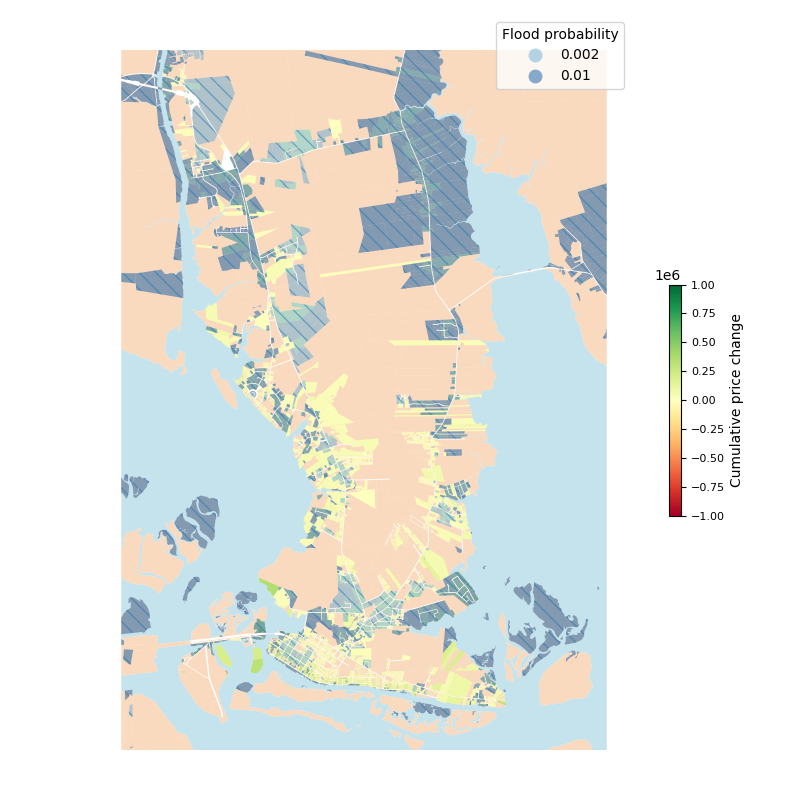

In [30]:
%matplotlib notebook
plot_beaufort(variable="Cumulative price change", year=30, divergent=True)

In [19]:
# %matplotlib inline
# for year in np.arange(0.5, 30, 1):
#     # NOTE: 30 years too long for plotting every year, but once in two years gives very sudden jumps.
#     plot_beaufort(variable="Cumulative price change", year=year, divergent=True, save=True)

### Household income

<IPython.core.display.Javascript object>


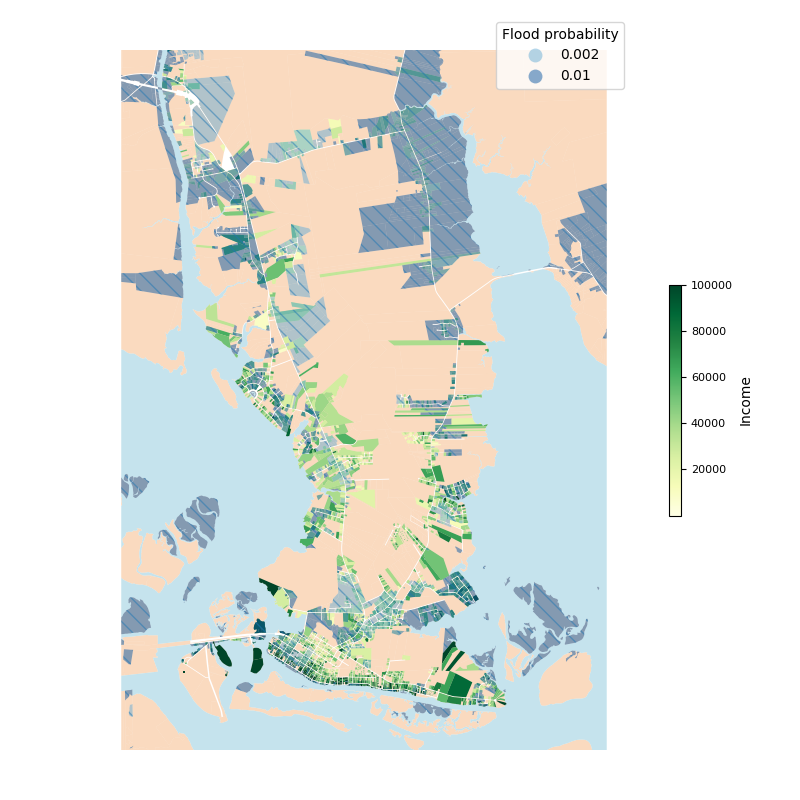

<IPython.core.display.Javascript object>


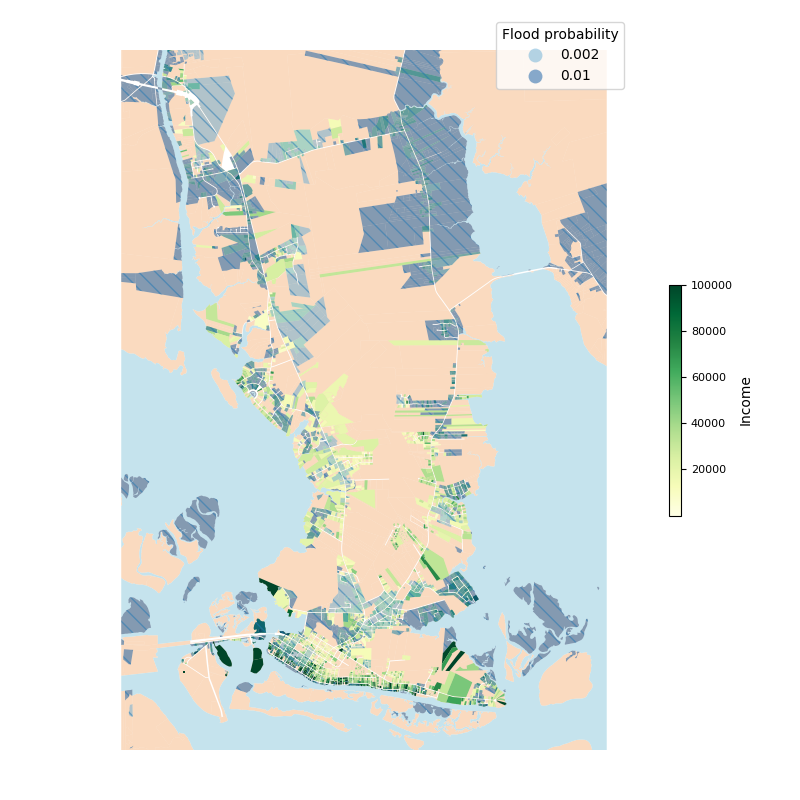

In [31]:
%matplotlib notebook
plot_beaufort(variable="Income", year=1)
plot_beaufort(variable="Income", year=30)

In [ ]:
%matplotlib inline
for year in np.arange(0.5, 10, 1):
    plot_beaufort(variable="Income", year=year, logscale=False, save=True)

### Spatial distributions

#### Amenities

In [47]:
parcel_df = pd.read_csv(parcel_file_csv)
parcel_df = parcel_df.rename(columns={"ID1": "Property ID"}).set_index("Property ID")

In [48]:
temp = spatial_df[spatial_df.index.isin(property_df.index)].copy()
temp["PROXAMEN_1"] = parcel_df["PROXAMEN_1"]
print("Proximity coastal amenities not in flood zone:", temp[(temp["DFLOOD_X_1"] == 0) &
                                                             (temp["DFLOOD_A_1"] == 0)]["PROXAMEN_1"].mean())
print("Proximity coastal amenities for 500 flood zone:", temp[temp["DFLOOD_X_1"] == 1]["PROXAMEN_1"].mean())
print("Proximity coastal amenities for 100 flood zone:", temp[temp["DFLOOD_A_1"] == 1]["PROXAMEN_1"].mean())

Proximity coastal amenities not in flood zone: 7003.512853784403
Proximity coastal amenities for 500 flood zone: 6381.742877403845
Proximity coastal amenities for 100 flood zone: 6943.780887711864


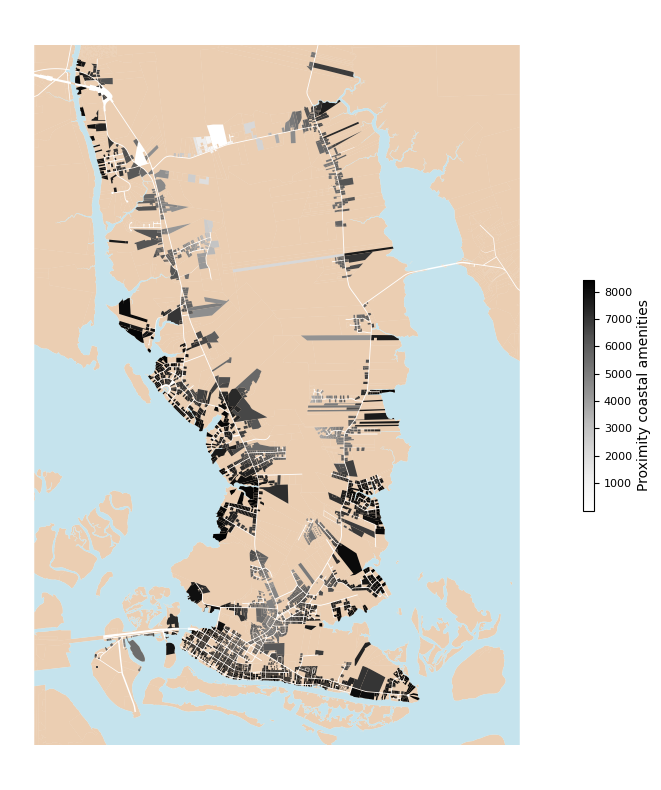

In [49]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,8))
ax.axis("off")

# Plot parcels
spatial_df[spatial_df["CITY"] != "Water"].plot(ax=ax,
                                               color="peru", alpha=0.4)
spatial_df[spatial_df["CITY"] == "Water"].plot(ax=ax,
                                               color="lightblue", alpha=0.7)

# Plot distance to coastal amenities
temp = spatial_df[spatial_df.index.isin(property_df.index)].copy()
temp["PROXAMEN_1"] = parcel_df["PROXAMEN_1"]
temp.plot("PROXAMEN_1", ax=ax, cmap="Greys",
          legend=True, legend_kwds={"shrink": 0.3, "label": "Proximity coastal amenities"})

# Plot settings
for ax in fig.axes:
    ax.tick_params(labelsize=8)
plt.tight_layout()
plt.show()

#### Tax values

In [50]:
print("Tax value not in flood zone:", spatial_df[(spatial_df["DFLOOD_X_1"] == 0) & (spatial_df["DFLOOD_A_1"] == 0)]["TAX_VALUE"].mean())
print("Tax value for 500 flood zone:", spatial_df[spatial_df["DFLOOD_X_1"] == 1]["TAX_VALUE"].mean())
print("Tax value for 100 flood zone:", spatial_df[spatial_df["DFLOOD_A_1"] == 1]["TAX_VALUE"].mean())

Tax value not in flood zone: 225440.62231759657
Tax value for 500 flood zone: 113471.03322784811
Tax value for 100 flood zone: 113575.3160460993


<IPython.core.display.Javascript object>


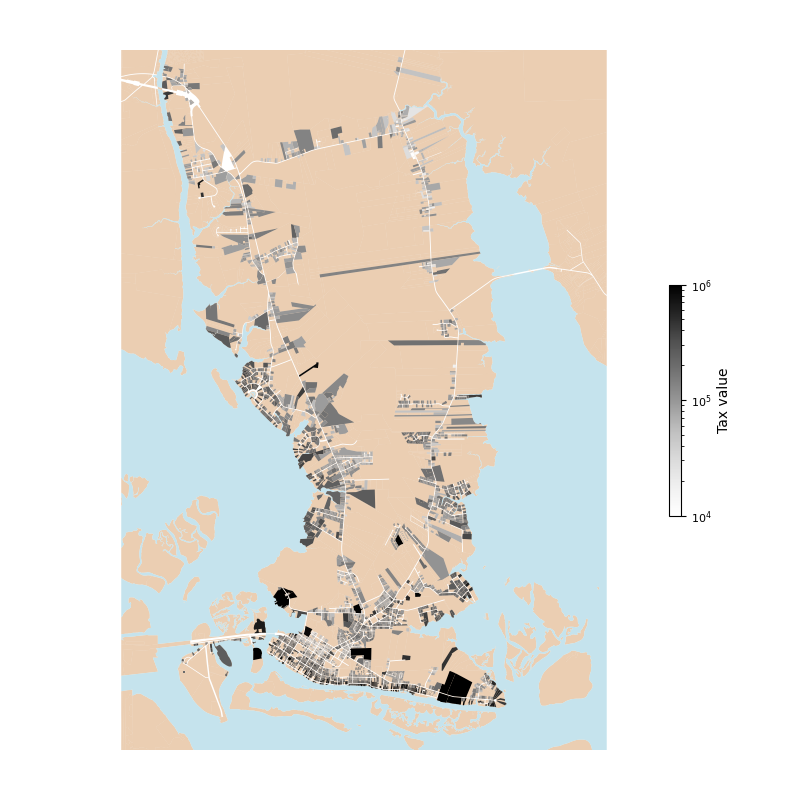

In [51]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(8,8))
ax.axis("off")

# Plot parcels
spatial_df[spatial_df["CITY"] != "Water"].plot(ax=ax,
                                               color="peru", alpha=0.4)
spatial_df[spatial_df["CITY"] == "Water"].plot(ax=ax,
                                               color="lightblue", alpha=0.7)

# Plot distance to coastal amenities
temp = spatial_df[spatial_df.index.isin(property_df.index)].copy()
temp.plot("TAX_VALUE", ax=ax, cmap="Greys",
          norm=colors.LogNorm(vmin=1e4, vmax=1e6),
          legend=True, legend_kwds={"shrink": 0.3, "label": "Tax value"})

# Plot settings
for ax in fig.axes:
    ax.tick_params(labelsize=8)
plt.tight_layout()
plt.show()